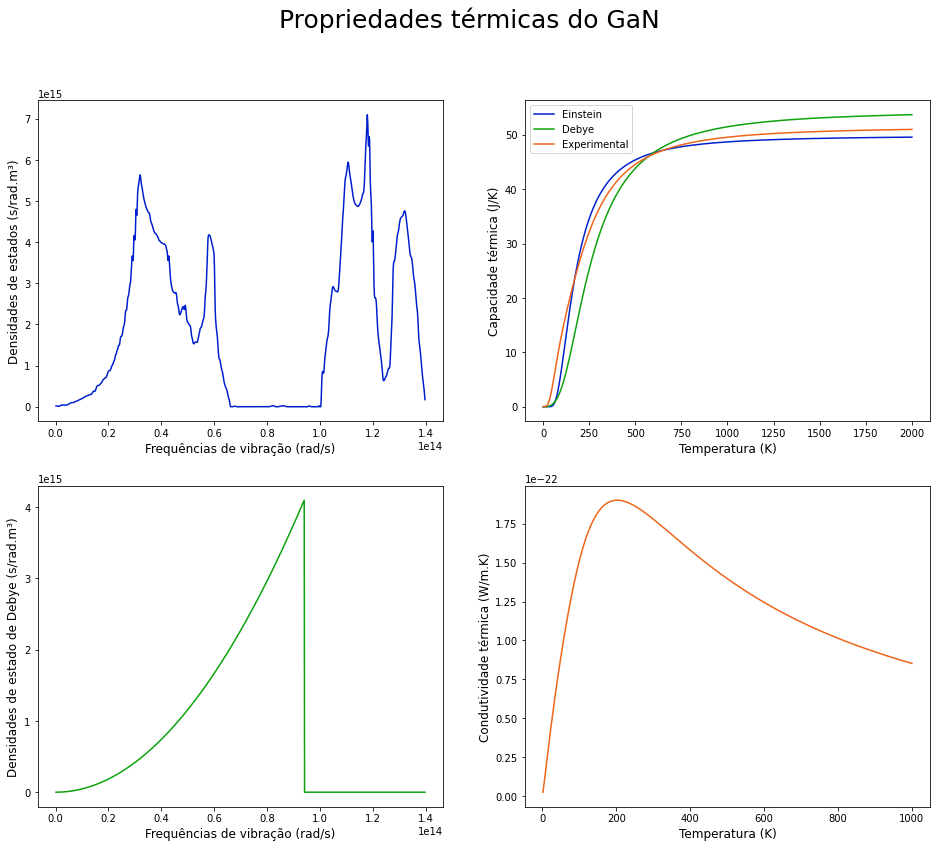

In [3]:
from extracaoDados import*
from modulo1 import*
from modulo2 import*
from modulo3 import*
from modulo4 import*
import warnings
import numpy as np
import matplotlib.pyplot as plt

'''o numpy gera um aviso de estar usando o exponencial de um grande numero,
mas o modulo lida normalmente com o calculo, logo podemos ignorar o aviso'''
warnings.filterwarnings('ignore')

#lendo os dados das frequências de vibração e densidades de estado do GaN
arquivo_gan = open('dadosGaN.txt')
omega_gan = []
densidade_estados_gan = []
ler_dados(omega_gan, densidade_estados_gan, arquivo_gan)

#calculando a média das frequências de vibração para utilizar no modelo de Einstein
omega_gan_einstein = sum(omega_gan)/len(omega_gan)

#definindo uma faixa de temperaturas
temperaturas = np.linspace(0.01,2000,10000)

'''calculando as capacidades térmicas para os diferentes modelos, sabendo que a 
velocidade do som no GaN é 6510 m/s (fonte: https://www.ioffe.ru/SVA/NSM/Semicond/GaN/mechanic.html)
e que sua densidade atômica é 4.28e28 átomos/m³'''

cv_gan_einstein = cv_einstein(omega_gan_einstein, 2*6.02e23, temperaturas)
cv_gan_debye = cv_debye(omega_gan, temperaturas, 6900, 2*6.02e23, 4.28e28)
cv_gan_experimental = cv_densidade_experimental(omega_gan, densidade_estados_gan, temperaturas, 4.28e28)

#densidade de estados de Debye 
densidade_debye_gan = densidade_debye(omega_gan, 6900, 4.28e28)

#faixa de temperatruas para a condutividade térmica e o cálculo desta
k_temp = np.linspace(1,1000,2000)
k_gan = condutiv(omega_gan, k_temp, 6900, 4.28e28)


'''plotando as densidades de estados experimentais, os resultados das capacidades térmicas de 0.01 a 2000 K, 
 a densidade de estados para o modelo de Debye e a condutividade térmica do Nitreto de Gálio de 1 a 1000K'''

fig, ax = plt.subplots(2,2, figsize=(16,13))

fig.suptitle('Propriedades térmicas do GaN', size=25)

ax[0][0].plot(omega_gan,densidade_estados_gan, color="#001fcd")
ax[0][0].set_xlabel('Frequências de vibração (rad/s)', size=12)
ax[0][0].set_ylabel('Densidades de estados (s/rad.m³)', size=12)

ax[0][1].plot(temperaturas, cv_gan_einstein, label='Einstein', color="#001fcd")
ax[0][1].plot(temperaturas, cv_gan_debye, label='Debye', color="#0ca20c")
ax[0][1].plot(temperaturas, cv_gan_experimental, label='Experimental', color="#ee6419")
ax[0][1].set_xlabel('Temperatura (K)', size=12)
ax[0][1].set_ylabel('Capacidade térmica (J/K)', size=12)
ax[0][1].legend()

ax[1][0].plot(omega_gan, densidade_debye_gan, color="#0ca20c")
ax[1][0].set_xlabel('Frequências de vibração (rad/s)', size=12)
ax[1][0].set_ylabel('Densidades de estado de Debye (s/rad.m³)', size=12)

ax[1][1].plot(k_temp, k_gan, color="#ee6419") 
ax[1][1].set_xlabel('Temperatura (K)', size=12)
ax[1][1].set_ylabel('Condutividade térmica (W/m.K)', size=12)
plt.show()